In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
x = df[['Level']].values
y = df[['Salary']].values

In [21]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [24]:
print(y)
#y= y.reshape(len(y),1)
#y

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [26]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [27]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

5 types of kernel,,we used "rbf"(redial basic function) kernel here.

this function use to draw map lower data and higher data in a hyper plane 

In [30]:
from sklearn.svm import SVR
sv = SVR(kernel = 'rbf')
sv.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

we have to inverse it because u did data standardization, so now to predict Y(salary) we need 1st actual value

In [40]:
y_pred = sc_y.inverse_transform(sv.predict(sc_x.transform([[8.3]])))
y_pred

array([374039.7289343])

In [46]:
#sv.score((sc_y.inverse_transform(y)),y_pred)

Text(0, 0.5, 'Salary')

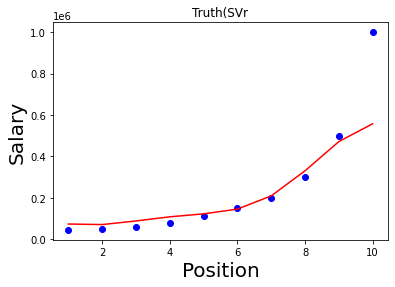

In [37]:
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = 'blue')
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(sv.predict(x)) , color = 'red')
plt.title("Truth(SVr")
plt.xlabel('Position' , fontsize=20)
plt.ylabel('Salary' , fontsize = 20)

Text(0, 0.5, 'Salary')

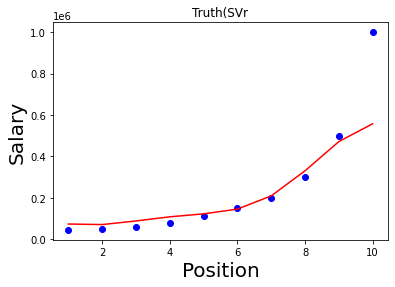

In [39]:
x_grid = np.arange(min(sc_x.inverse_transform(x)) , max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = 'blue')
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(sv.predict(x)) , color = 'red')
plt.title("Truth(SVr")
plt.xlabel('Position' , fontsize=20)
plt.ylabel('Salary' , fontsize = 20)